In [20]:
import csv
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np
from matplotlib.transforms import BlendedGenericTransform

In [21]:
channel_num = 7
channel_list = [2,4,6]

dataset = 'Pathway1_1'
start_frame = 310
image_num = 548

folder = 'results' #1-1  310-548
method_list = ['mask-rcnn','yolo','SSD','faster-rcnn'] 
method_name = ['Mask R-CNN','YOLO','SSD','faster R-CNN']


In [2]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120) 
              ,(214, 39, 40), (255, 152, 150),(44, 160, 44), (152, 223, 138)
              , (140, 86, 75), (196, 156, 148), (148, 103, 189), (197, 176, 213)
            , (23, 190, 207), (158, 218, 229) #light blue
             ,(227, 119, 194), (247, 182, 210)  #light green
             , (188, 189, 34), (219, 219, 141)  #pink
             ,(127, 127, 127), (199, 199, 199) #grey
              
            ]
hatch_style = ['/',  '.', 'o', 'x', '|',  '+' ,   '-' ]
               
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [3]:
def conf_mat_gen(filename):
    confidence_mat = [[0 for x in range(image_num)] for y in range(channel_num)]
    with open(filename, 'r') as csvfile:

    # 讀取 CSV 檔案內容
        rows = csv.reader(csvfile)
    # 以迴圈輸出每一列
        for row in rows:        
            channel_idx = int(row[0])        
            img = int(row[1])
            
            type = row[7].strip()

            if(type == 'person'):

                
                confidence = row[6]
                confidence_mat[channel_idx][img] = float(confidence)

                startX = int(float(row[2]))
                startY = int(float(row[3]))
                endX = int(float(row[4]))
                endY = int(float(row[5]))



    csvfile.close()
    return confidence_mat

In [4]:
def cont_range(confident_mat,th):
    
    start=0
    end=0
    tag=False
    my_list=[]
    for idx,conf in enumerate(confident_mat):
        #print(idx)
        if tag==False and conf>th:
            start=idx
            end=idx
            tag=True
            #print("[1]"+str(start)+","+str(end))
        elif tag==True and conf>th:
            end=idx
            #print("[2]"+str(start)+","+str(end))
        
        if tag==True and (conf<th or idx==np.size(confident_mat)-1):
            tag=False
            #print("[3]"+str(start)+","+str(end))
            if end-start>10:
                my_list.append((start,end))
            
    return my_list


In [5]:
def plot_conf(m_name,confidence_mat,th):
    fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
    #fig = plt.figure(figsize=(8,4), dpi= 80)          
    for idx,ch in enumerate(channel_list):            

        y = confidence_mat[ch][start_frame:]           
        y1= signal.medfilt(y,3)      
        range_list =cont_range(y1,th)   # (1) cont_range   (2) plot_count
        
        #print(ch)
        #drop_list = filter_drop(y1,range_list,0.1)    
        for r in range_list:
            print('{}~{}'.format(r[0]+start_frame,r[1]+start_frame))
            x=range(r[0]+start_frame,r[1]+1+start_frame)
            Y=y1[r[0]:r[1]+1]
            plt.subplot(np.size(channel_list),1,idx+1)
            plt.plot(x,Y,color=tableau20[ch])
        #print(drop_list)
        plt.title("channel"+str(ch))

        plt.ylim(0,1.1)
        plt.xlim(start_frame,image_num)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle(m_name, fontsize=12)

469~545
422~544
391~417
421~544
456~545
420~544
415~519
490~510
514~544
491~530
481~499
513~530
466~544
420~531
373~524


c:\users\superorange\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


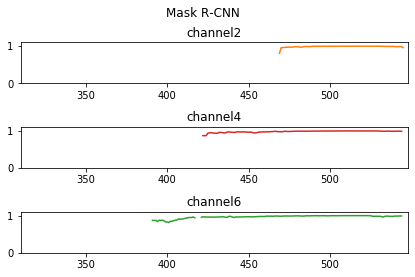

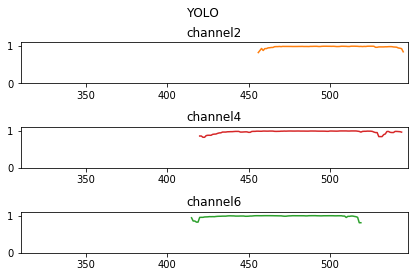

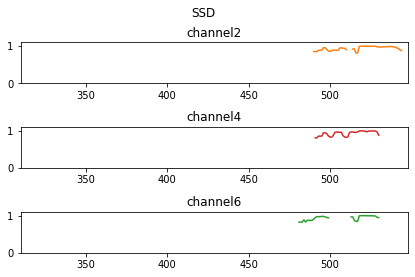

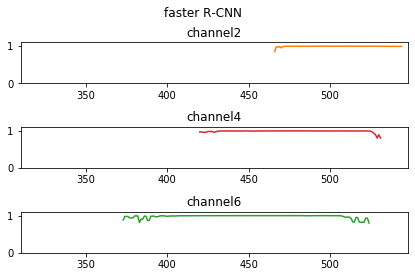

In [10]:

for i,method in enumerate(method_list):
    m_name = method_name[i]
    filename = folder+"/"+method+"_"+dataset+".txt"
    conf_mat = conf_mat_gen(filename)
    plot_conf(m_name,conf_mat,0.8)

In [11]:
def plot_scatter_conf(mname,confidence_mat,th):
    fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
    #fig = plt.figure(figsize=(8,4), dpi= 80)  
    x=range(start_frame,image_num)
    line =[]
    for idx,ch in enumerate(channel_list):            

        y = confidence_mat[ch][start_frame:]           
        y1= signal.medfilt(y,3)      
        range_list =cont_range(y1,th)   # (1) cont_range   (2) plot_count
        y2=y1.copy()
        #print(y2)
        #line_count=0
        for r in range_list:
            Y=np.zeros(image_num-start_frame)        
            Y=y1[r[0]:r[1]+1]
            X=x[r[0]:r[1]+1]
            y2[r[0]:r[1]+1]=-1           
            #print(y2)
            fig_tmp, = axs[idx].plot(X,Y,label="channel"+str(ch),color=tableau20[ch])
            line.append(fig_tmp)
            #line_count=line_count+1
        axs[idx].set_ylabel("channel "+str(ch), size =12)
        axs[idx].scatter(x,y2,s=5,color=tableau20[ch],alpha=0.2)    
            
            
        
    for ax in axs:
        ax.label_outer()
        ax.set_ylim(0,1.1)
        ax.set_xlim(start_frame,image_num)
    
    #fig.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    fig.suptitle(mname, fontsize=12)
    
    fig.savefig(method+'.png', bbox_inches='tight')

    
  

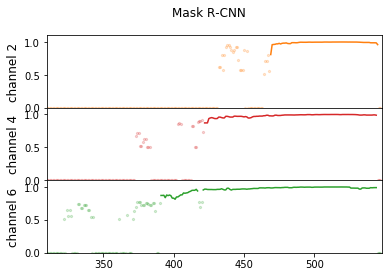

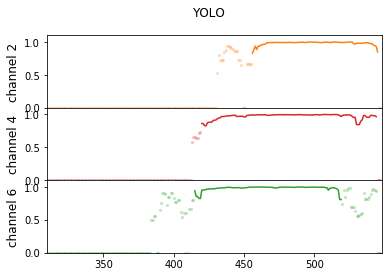

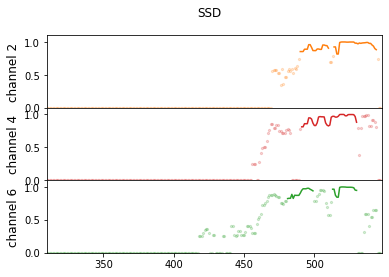

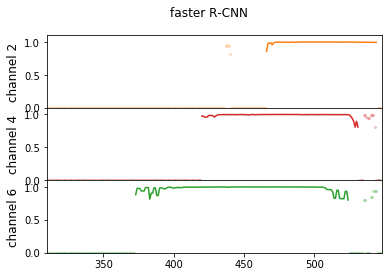

In [12]:
for i,method in enumerate(method_list):
    m_name = method_name[i]
    filename = folder+"/"+method+"_"+dataset+".txt"
    conf_mat = conf_mat_gen(filename)
    plot_scatter_conf(m_name,conf_mat,0.8)



In [13]:
def plot_all(confidence_mat):
    fig = plt.figure(figsize=(8,4), dpi= 80)  
    x=range(start_frame,image_num)
    ax=[]
    for idx,ch in enumerate(channel_list):            

        y = confidence_mat[ch][start_frame:]           
        y1= signal.medfilt(y,3)      
                
        plt.subplot(np.size(channel_list),1,idx+1)
        plt.scatter(x,y,s=1,label="channel"+str(ch),color=tableau20[ch])
            
        plt.ylim(0,1.1)
        plt.xlim(start_frame,image_num)
        
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle(method, fontsize=12)
    

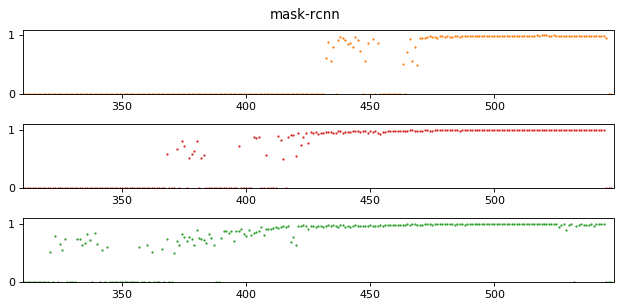

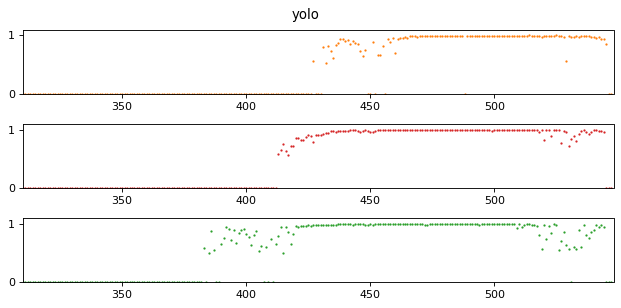

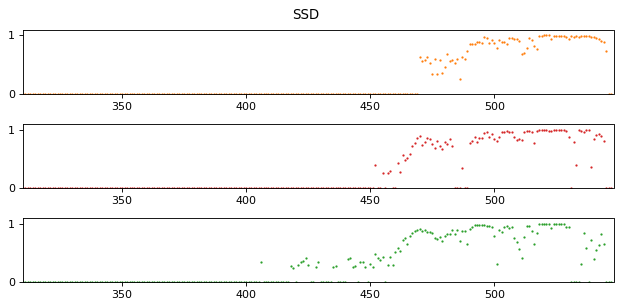

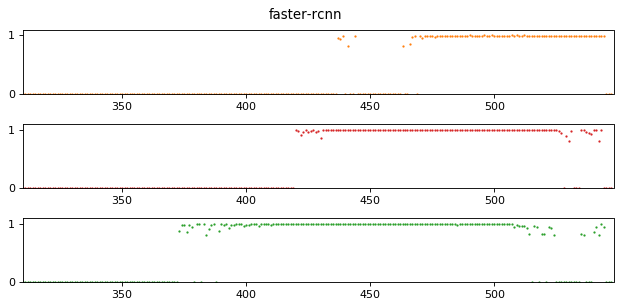

In [14]:
for method in method_list:
    filename = folder+"/"+method+"_"+dataset+".txt"
    conf_mat = conf_mat_gen(filename)
    plot_all(conf_mat)

## face

In [15]:
def face_conf_mat_gen(filename,image_num):
    
    confidence_mat = [[[0 for x in range(image_num)] for y in range(channel_num)] for z in range(people_num)]
    with open(filename, 'r',encoding='gbk') as csvfile:

    # 讀取 CSV 檔案內容
        rows = csv.reader(csvfile)
    # 以迴圈輸出每一列
        for row in rows:        
            channel_idx = int(row[0])        
            img = int(row[1])
            
            people_idx = int(row[7])
            if people_idx!=0:
                
            
                confidence = row[6]
                confidence_mat[people_idx-1][channel_idx][img] = float(confidence)

#             startX = int(float(row[2]))
#             startY = int(float(row[3]))
#             endX = int(float(row[4]))
#             endY = int(float(row[5]))

    csvfile.close()
    return confidence_mat

In [16]:
def plot_face(confidence_mat,start_frame,end_frame,th):
    
    x=range(start_frame,end_frame)
    for pp in range(0,people_num):
        fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
           
        line =[]
        for idx,ch in enumerate(channel_list):            

            y = confidence_mat[pp][ch][start_frame:end_frame]     
            
            y1= signal.medfilt(y,3)      
            
            range_list =cont_range(y1,th)   # (1) cont_range   (2) plot_count
            y2=y1.copy()

            for r in range_list:
                Y=np.zeros(end_frame-start_frame)        
                Y=y1[r[0]:r[1]+1]
                X=x[r[0]:r[1]+1]
                y2[r[0]:r[1]+1]=-1           
                fig_tmp, = axs[idx].plot(X,Y,label="channel"+str(ch),color=tableau20[idx*4])
                line.append(fig_tmp)
            axs[idx].set_ylabel("channel "+str(ch), size =12)
            axs[idx].scatter(x,y2,s=5,color=tableau20[idx*4],alpha=0.2)    



        for ax in axs:
            ax.label_outer()
            ax.set_ylim(0,1.1)
            ax.set_xlim(start_frame,end_frame)

        fig.suptitle('person '+str(pp+1), fontsize=12)
        fig.savefig('person'+str(pp+1)+'.png', bbox_inches='tight')
    

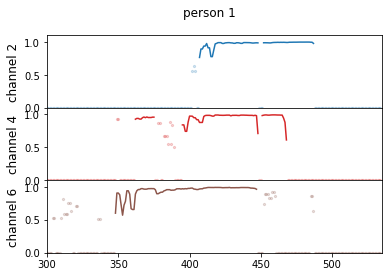

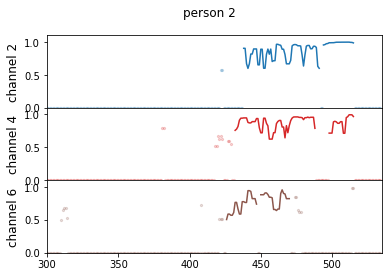

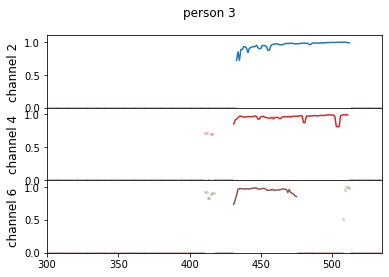

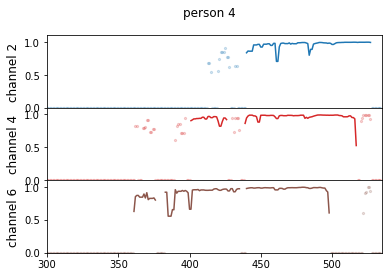

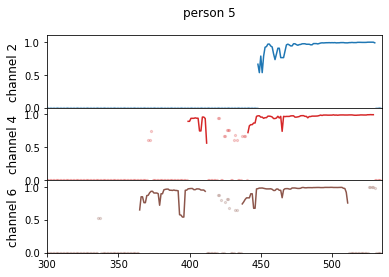

In [18]:
filename = 'result_collect/Pathway2_3_face_sorted.csv'
people_num = 5
conf_mat = face_conf_mat_gen(filename,593)
plot_face(conf_mat,300,535,0.5)

In [229]:
y = conf_mat[4][2][531]     
y

0.6128237

In [218]:
y = conf_mat[4][2][300:593]     

y1= signal.medfilt(y,3)      
y1
            

array([0.        , 0.8904223 , 0.8904223 , 0.6702441 , 0.        ,
       0.        , 0.        , 0.        , 0.5376151 , 0.5376151 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.5596382 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.62163776, 0.62163776,
       0.62163776, 0.        , 0.        , 0.        , 0.        ,
       0.6486484 , 0.69522464, 0.69522464, 0.        , 0.        ,
       0.        , 0.5260815 , 0.5754059 , 0.5260815 , 0.     

## test

Text(0.5,0.98,'test')

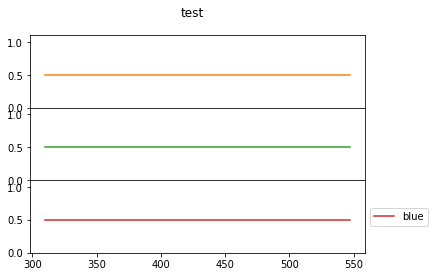

In [144]:
#fig =  plt.figure(figsize=(8,4), dpi= 80)  
fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
x=range(start_frame,image_num)    
y = [0.5]*(image_num-start_frame)

#fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

#axs[0] = plt.subplot(3,1,1)
axs[0].plot(x,y,color=tableau20[2],label='channel 2')

#axs[1] =plt.subplot(3,1,2)
axs[1].plot(x,y,color=tableau20[4],label='channel 4')
#axs[2] =plt.subplot(3,1,3)
axs[2].plot(x,y,color=tableau20[6],label='channel 6')

#plt.ylim(0,1.1)

for ax in axs:
    ax.label_outer()
    ax.set_ylim(0,1.1)
#ax1.set_xticklabels([])
#ax2.set_xticklabels([])

#ax1.get_shared_x_axes().join(ax1, ax2,ax3)


legend_x = 1
legend_y = 0.5
plt.legend(["blue", "green"], loc='center left', bbox_to_anchor=(legend_x, legend_y))
fig.suptitle('test', fontsize=12)



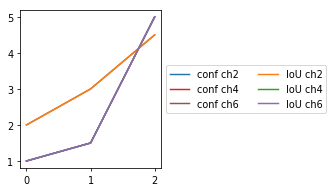

In [22]:
w = 4
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)
y1 = [2, 3, 4.5]
y2 = [1, 1.5, 5]

plt.plot(y2,color=tableau20[0])
plt.plot(y2,color=tableau20[6])
plt.plot(y1,color=tableau20[10])

plt.plot(y1,color=tableau20[2])
plt.plot(y2,color=tableau20[4])
plt.plot(y2,color=tableau20[8])

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend(["conf ch2", "conf ch4","conf ch6","IoU ch2", "IoU ch4","IoU ch6"],ncol=2, loc='center left', bbox_to_anchor=(legend_x, legend_y))
plt.savefig("out.png")

/home/superorange5/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


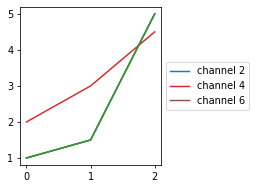

In [49]:
w = 4
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)
y1 = [2, 3, 4.5]
y2 = [1, 1.5, 5]

plt.plot(y2,color=tableau20[0])
plt.plot(y1,color=tableau20[4])
plt.plot(y2,color=tableau20[8])
plt.plot(y2,color=tableau20[6])


ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend(["channel 2", "channel 4","channel 6"] ,loc='center left', bbox_to_anchor=(legend_x, legend_y))


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

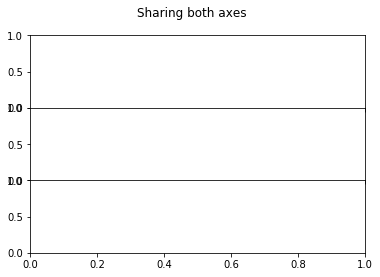

In [7]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t= np.arange(1000)/100.
x = np.sin(2*np.pi*10*t)
y = np.cos(2*np.pi*10*t)

fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(t,x)
ax2.plot(t,y)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])
# ax2.autoscale() ## call autoscale if needed

plt.show()

In [24]:
s = ',face'
with open('result_collect/faster-rcnn_face_Pathway2_3_2.txt', 'w') as out_file:
    with open('result_collect/faster-rcnn_face_Pathway2_3.txt', 'r') as in_file:
        for line in in_file:
            out_file.write(line.rstrip('\n') + s + '\n')